# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes average SAT scores for each of 52 States: Verbal and Math Scores, along with the rates of Test taking? I'm guessing it is the percentage of eligible students taking the SAT's.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There is Verbal and Math scores for all 51 states. It looks pretty complete. However, each Verbal and Math score is probably an average for the whole state. What is missing is the the actual sample size for each state. Some states have smaller populations. The less populous sates have lower testing rates, evidence that the score sampling from each state may not be a randomly taken sample. And the score sampling is not soley dependent on the state.

In [1]:
pwd

u'/Users/noriogura/Desktop/DSI-SF-1-NORI2/project-01/starter-code'

##### 3. Create a data dictionary for the dataset.

In [2]:
#Data dictionary for the dataset

d={}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

sales_csv_path = '../assets/sat_scores.csv'

with open(sales_csv_path, 'r') as f:
    
    reader = csv.reader(f)
    list = []
    
    for row in reader:
        list.append(row)

d= list

##### 5. Print the data

In [4]:
#print list
print d

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [5]:
i = 0
header = {}
header = d[i]
print header

body = {}
body = d[1:len(d)]
print body
print len(d)

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [6]:
e = {}
for i, h in enumerate (header): #ENUMERATE
    col = []
    for row in body:
        cell = row[i]
        col.append(cell)
    e[h] = col

a_key = 'State'
#state_index = header.index(a_key)
States = e[a_key]
print States

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [7]:
for i, h in enumerate (body[1]): #Looking at 1st row of body only
    print str(h) + str(type(h))

NJ<type 'str'>
81<type 'str'>
499<type 'str'>
513<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
d_check = {}
a = "No need to reassign: string types only"

for i, h in enumerate (header): #ENUMERATE
    for row in body:
        cell = row[i]
        if type(cell) != str:
            a =  "Something in " + str(cell) + " is not a string"
print a


No need to reassign: string types only


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [9]:
print header

a_key = 'State'
state_index = header.index(a_key)
states = e[a_key]

#maths = e['Math']
#rates = e['Rate']
#verbals = e['Verbal']
#states = e['State']  

#for i,h in enumerate (states):
#    col = []
#    col.append(maths[i])
#    col.append(rates[i])
#    col.append(verbals[i])
#    e[states[i]] = col


g = {}

for i,h in enumerate (states):
    col = []
    for k in (header):
        if k != a_key: #skip over data that has states key
            col.append(e[k][i])
        g[states[i]] = col #use states as key

print g

header_no_states = []
for i, h in enumerate (header):
    if h != a_key:
        header_no_states.append(h)
print header_no_states
    

['State', 'Rate', 'Verbal', 'Math']
{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NB': ['8', '562', '568'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543',

##11. Create a dictionary with the values for each of the numeric columns

In [12]:
z={}

#for i,h in enumerate (states):
#    col = {}
#    col['Math']=maths[i]
#    col['Rates']=rates[i]
#    col['Verbals']=verbals[i]
#    z[states[i]] = col

print header_no_states

for i,h in enumerate (states):
    col = {}
    for k in (header_no_states):
        col[k]= (e[k][i])
    z[states[i]] = col #use states as key

print z

['Rate', 'Verbal', 'Math']
{'WA': {'Rate': '53', 'Math': '527', 'Verbal': '527'}, 'DE': {'Rate': '67', 'Math': '499', 'Verbal': '501'}, 'DC': {'Rate': '56', 'Math': '474', 'Verbal': '482'}, 'WI': {'Rate': '6', 'Math': '596', 'Verbal': '584'}, 'WV': {'Rate': '18', 'Math': '512', 'Verbal': '527'}, 'HI': {'Rate': '52', 'Math': '515', 'Verbal': '485'}, 'FL': {'Rate': '54', 'Math': '499', 'Verbal': '498'}, 'WY': {'Rate': '11', 'Math': '545', 'Verbal': '547'}, 'NH': {'Rate': '72', 'Math': '516', 'Verbal': '520'}, 'NJ': {'Rate': '81', 'Math': '513', 'Verbal': '499'}, 'NM': {'Rate': '13', 'Math': '542', 'Verbal': '551'}, 'TX': {'Rate': '53', 'Math': '499', 'Verbal': '493'}, 'LA': {'Rate': '7', 'Math': '562', 'Verbal': '564'}, 'NB': {'Rate': '8', 'Math': '568', 'Verbal': '562'}, 'NC': {'Rate': '65', 'Math': '499', 'Verbal': '493'}, 'ND': {'Rate': '4', 'Math': '599', 'Verbal': '592'}, 'TN': {'Rate': '13', 'Math': '553', 'Verbal': '562'}, 'NY': {'Rate': '77', 'Math': '505', 'Verbal': '495'}, 'PA'

 Step 3: Describe the data

##### 12. Print the min and max of each column

In [13]:
maths_min = min(maths)
rates_min = min(rates)
verbals_min = min(verbals)
maths_max = max(maths)
rates_max = max(rates)
verbals_max = max(verbals)

print "Math Min: " + str(maths_min) + " Math Max: " + str(maths_max) 
print "Rates Min: " + str(rates_min) + " Rates Max: " + str(rates_max)
print "Verbals Min: " + str(verbals_min) + " Verbals Max: "+ str(verbals_max)


NameError: name 'maths' is not defined

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [160]:
def list_out(a , z):
    y = {}
    y = {n:float(z[n][a]) for n in z}
    return y.values()

def mean_out(a):
    return np.mean(a)

Rates = list_out('Rate', z)
Verbals = list_out('Verbal', z)
Maths = list_out('Math', z)

def calc_std(y):
    return np.sqrt(np.mean([(x-mean_out(y))**2 for x in y]))

print calc_std(Rates)
print calc_std(Verbals)
print calc_std(Maths)

27.0379964945
32.9150949616
35.6669961643


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

[82 81 79 77 72 71 71 69 69 68 67 65 65 63 60 57 56 55 54 53 53 52 51 51 34
 33 31 26 23 18 17 13 13 12 12 11 11  9  9  9  8  8  8  7  6  6  5  5  4  4
  4 45]
[509 499 511 495 520 501 500 511 506 510 501 508 493 491 499 486 482 526
 498 527 493 485 514 498 523 509 539 534 539 527 543 562 551 576 550 547
 561 580 577 559 562 567 577 564 584 562 575 593 577 592 566 506]


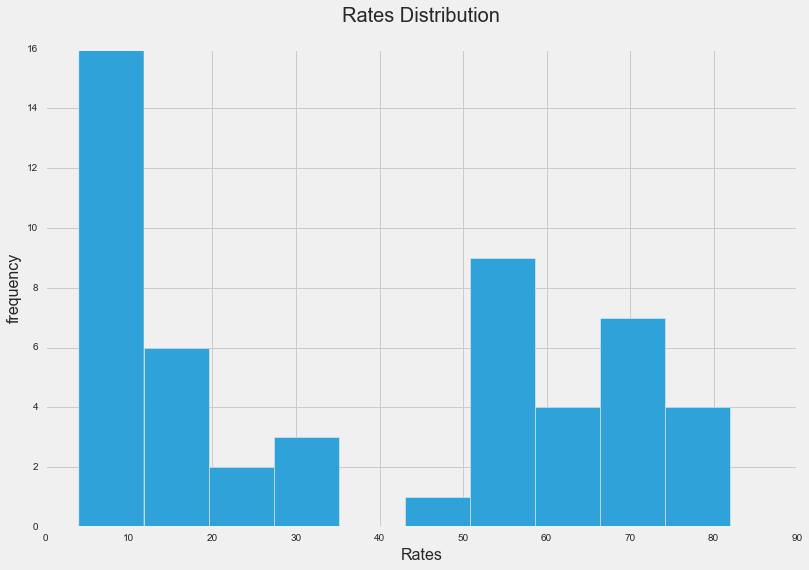

In [173]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py #API of plotly
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in jupyter notebook:
%matplotlib inline

SAT_SCORES = pd.read_csv(sales_csv_path) #load pandas in csv

SAT_SCORES.head()
states = SAT_SCORES.State.values
rates = (SAT_SCORES.Rate.values)
print rates
verbals = SAT_SCORES.Verbal.values
print verbals
maths = SAT_SCORES.Math.values

plt.style.use('fivethirtyeight') #style of fivethirtyeight blog

fig = plt.figure(figsize=(12,8))

axes = fig.gca()
axes.hist(rates)
#axes.scatter(years_in_job, rates, c='darkred', s=150) #s size of dots
axes.set_title('Rates Distribution\n', fontsize=20)
axes.set_xlabel('Rates', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)

##### 15. Plot the Math distribution

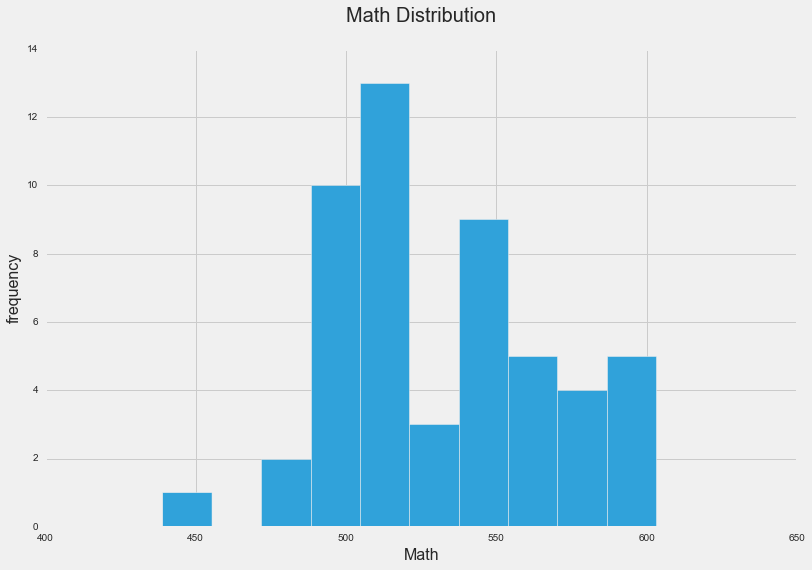

In [14]:
fig = plt.figure(figsize=(12,8))

axes = fig.gca()
axes.hist(maths)
axes.set_title('Math Distribution\n', fontsize=20)
axes.set_xlabel('Math', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)

##### 16. Plot the Verbal distribution

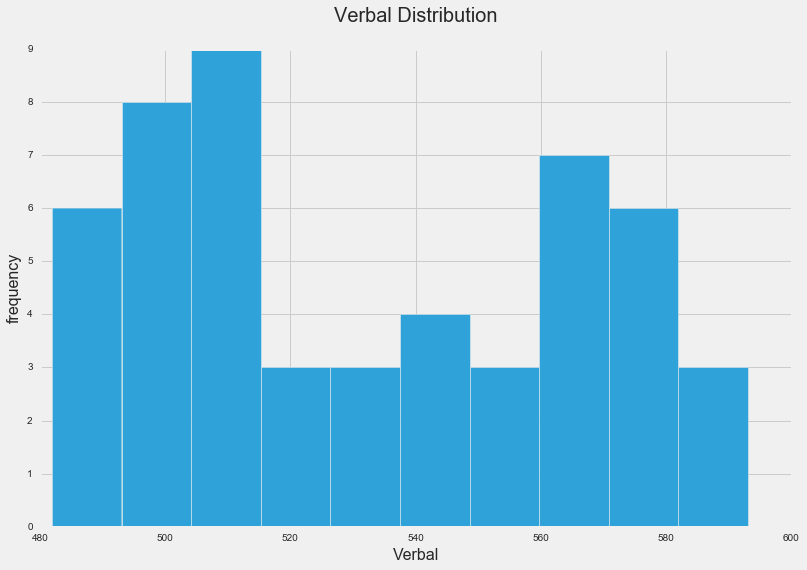

In [15]:
fig = plt.figure(figsize=(12,8))

axes = fig.gca()
axes.hist(verbals)
axes.set_title('Verbal Distribution\n', fontsize=20)
axes.set_xlabel('Verbal', fontsize=16)
axes.set_ylabel('frequency', fontsize=16)

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

Verbals = go.Histogram(
    x = verbals, #'and' can only have receive one value elements, not lists
)

data = [Verbals]

layout = go.Layout(
    title='Verbal Distribution',
    hovermode='closest',
    xaxis={
        'title':'Verbal Scores',
        'ticklen':1,
        'gridwidth':1,
    },
    yaxis={
        'title':'Frequency',
        'ticklen':5,
        'gridwidth':2,
    },
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Verbal Distribution')
##>>> trace1 = Histogram(x=x)
##>>> data = Data([trace1])
##>>> py.plot(data)

##### 17. What is the typical assumption for data distribution?

In [ ]:
The typical assumption for a sample size of large enough data points > 20, that is randomly taken, is that it is a normal distribution. 

##### 18. Does that distribution hold true for our data?

In [ ]:
The distribution does not hold true for our data. It is NOT a nice bell shaped distribution with a single peak for Scores or Rates.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

In [161]:
import plotly.plotly as py
import plotly.graph_objs as go

Verbals = go.Scatter(
    x = states,
    y = verbals,
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"x",
            'opacity':0.65},
    name='Verbals'
)

Maths = go.Scatter(
    x = states,
    y = maths,
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"square",
            'opacity':0.65},
    name='Maths'
)

Rates = go.Scatter(
    x = states,
    y = rates,
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"circle",
            'opacity':0.65},
    name='Rates'
)

data = [Verbals, Maths, Rates]

layout = go.Layout(
    title='SAT Scores',
    hovermode='closest',
    xaxis={
        'title':'States',
        'ticklen':5,
        'gridwidth':2,
    },
    yaxis={
        'title':'SAT Scores',
        'ticklen':5,
        'gridwidth':2,
    },
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Years in Job vs. Yearly Salary')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~NoriOgura/0 or inside your plot.ly account where it is named 'Years in Job vs. Yearly Salary'


##### 20. Are there any interesting relationships to note?

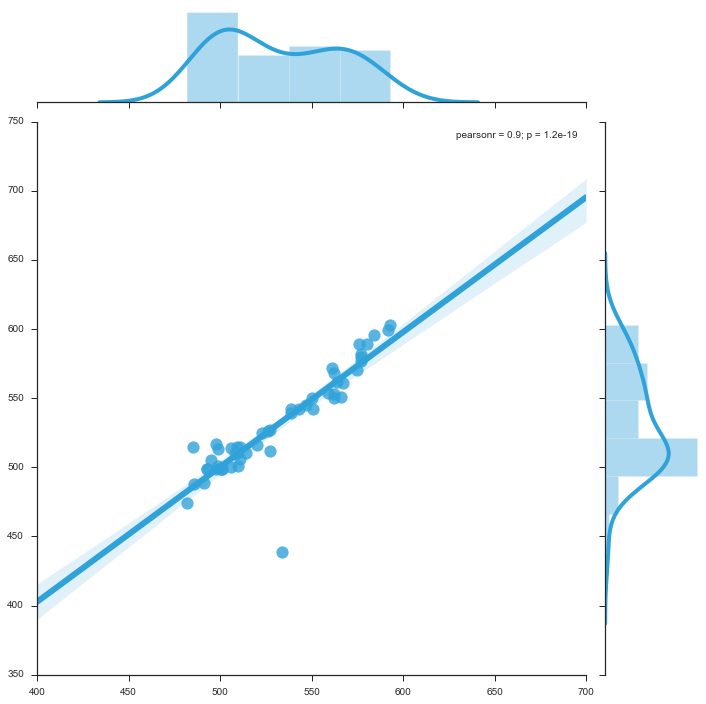

In [177]:
states = SAT_SCORES.State.values
rates = (SAT_SCORES.Rate.values)
#print rates
verbals = SAT_SCORES.Verbal.values
#print verbals
maths = SAT_SCORES.Math.values

sns.set_style('ticks')
#print verbals
sns.jointplot(verbals, maths, kind='reg', size=10, joint_kws={'scatter_kws': {'s': 150}})

#OUTPUT looks like there is a correlation between Verbal and Math scores.
Additionally from the series of plots below, it looks like the lower the rate, the higher the Math and Verbal scores.
Which probably means the averages are skewed for the lower rates because the top students are the only ones taking the SAT

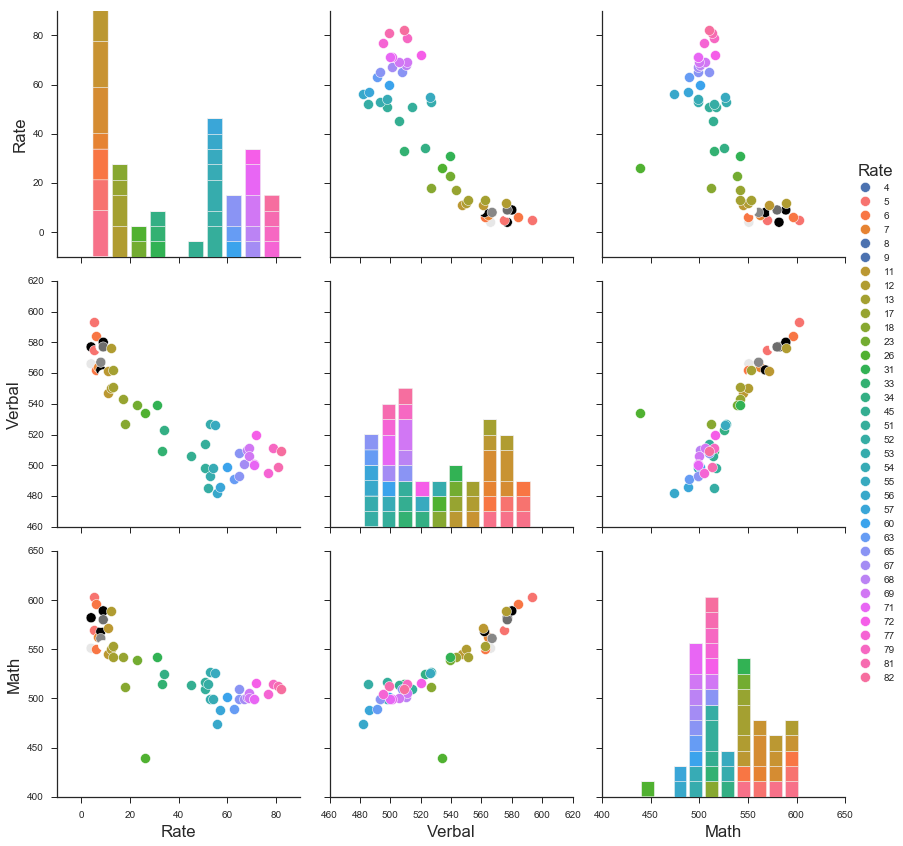

In [184]:
subset = SAT_SCORES[['Rate','Verbal','Math']]
#print SAT_SCORES
sns.pairplot(subset, hue='Rate', size=4, plot_kws={'s': 100})                     

##### 21. Create box plots for each variable. 

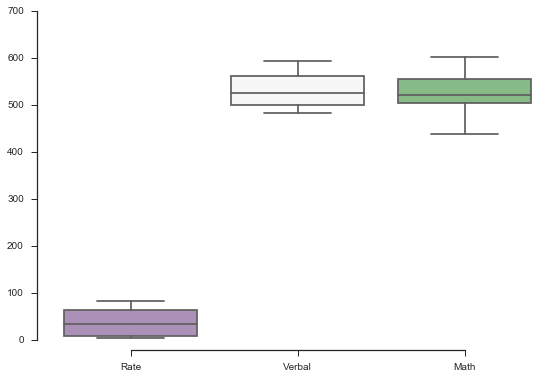

In [190]:
import seaborn as sns
sns.set(style="ticks")
subset = SAT_SCORES[['Rate','Verbal','Math']]
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(data=subset, palette="PRGn")
sns.despine(offset=10, trim=True)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 